In [23]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Data cleaning

In [17]:
def clean_polymer_data(df):
    # Remove unnamed columns
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    # Drop rows with all NaN values
    df = df.dropna(how='all')
    
    # Clean tI/2_Acetate column
    df['tI/2_Acetate'] = df['tI/2_Acetate'].apply(lambda x: 0 if isinstance(x, str) and '0 (instable during formulation)' in x else x)
    
    # Clean tI/2_PBS column
    def clean_pbs(x):
        if pd.isna(x):
            return x
        if isinstance(x, str):
            if x.lower() == 'stable':
                return 'stable'
            elif '0 (instable during formulation)' in x or '<6 (measurement failed)' in x:
                return 'unstable'
            # Try to convert string to float, if successful, label as 'unstable'
            try:
                float(x)
                return 'unstable'
            except ValueError:
                return x
        # If it's already a number (int or float), label as unstable
        if isinstance(x, (int, float)):
            return 'unstable'
        return x

    df['tI/2_PBS'] = df['tI/2_PBS'].apply(clean_pbs)
    
    return df

In [16]:
# Read the raw data
raw_data = pd.read_csv('/home/ta45woj/PolySpeckML/data/Ac(e)DexStabilitydata_16_09.csv')

# Clean the data
cleaned_data = clean_polymer_data(raw_data) # function calling

# save the cleaned data
cleaned_data.to_csv('/home/ta45woj/PolySpeckML/data/Ac(e)DexStabilitydata_16_09_cleaned.csv', index=False)

### Exploratory Data Analysis

Basic Statistics:
        DS_acycl    DS_cycl  tI/2_Acetate
count  42.000000  42.000000     42.000000
mean    0.661667   1.666190      7.697619
std     0.274448   0.432536      8.297654
min     0.100000   0.510000      0.000000
25%     0.470000   1.505000      0.820000
50%     0.680000   1.880000      3.920000
75%     0.792500   1.950000     13.240000
max     1.250000   2.050000     27.860000

Correlation Matrix:
              DS_acycl   DS_cycl  tI/2_Acetate
DS_acycl      1.000000 -0.800923     -0.099799
DS_cycl      -0.800923  1.000000      0.525789
tI/2_Acetate -0.099799  0.525789      1.000000


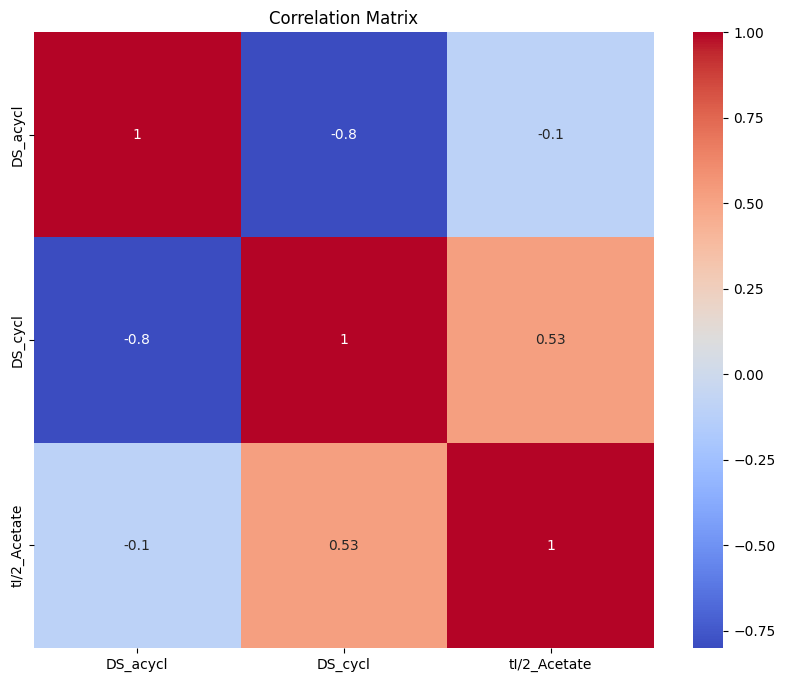

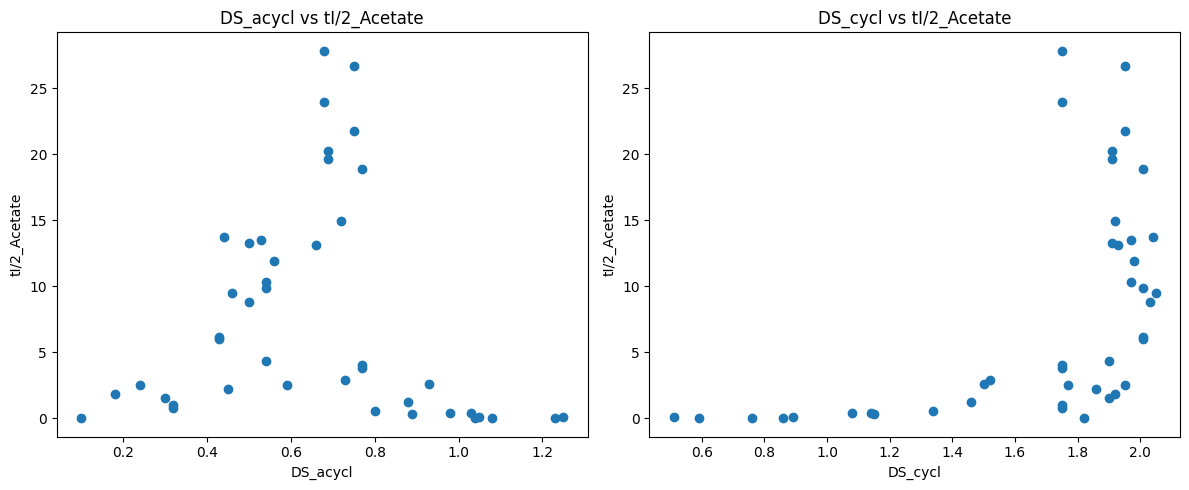

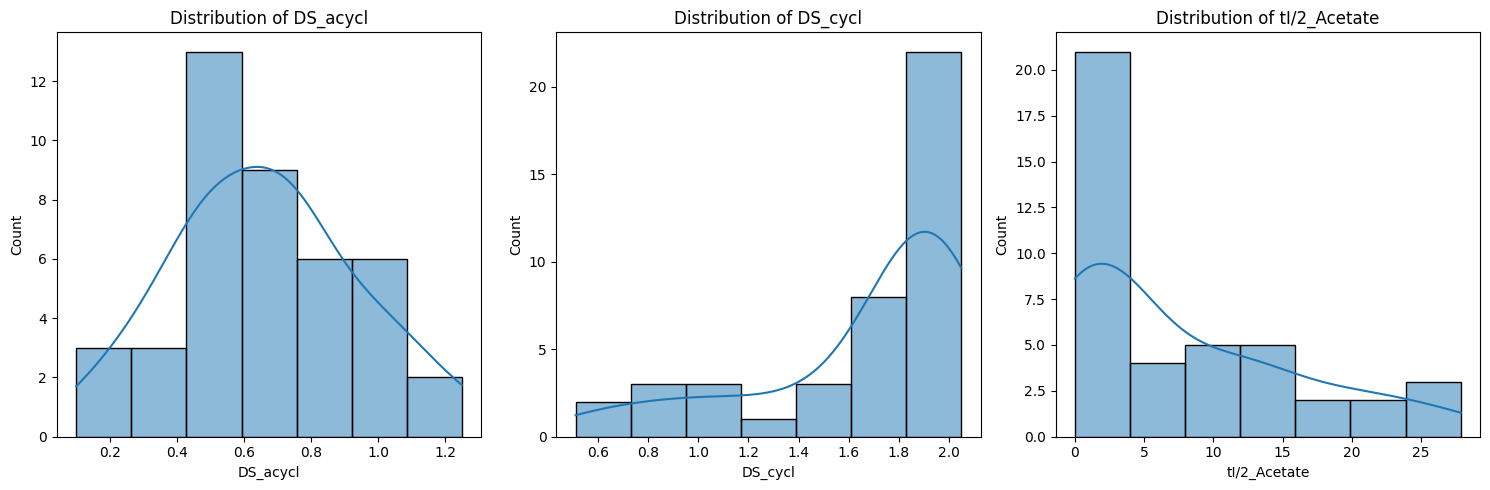

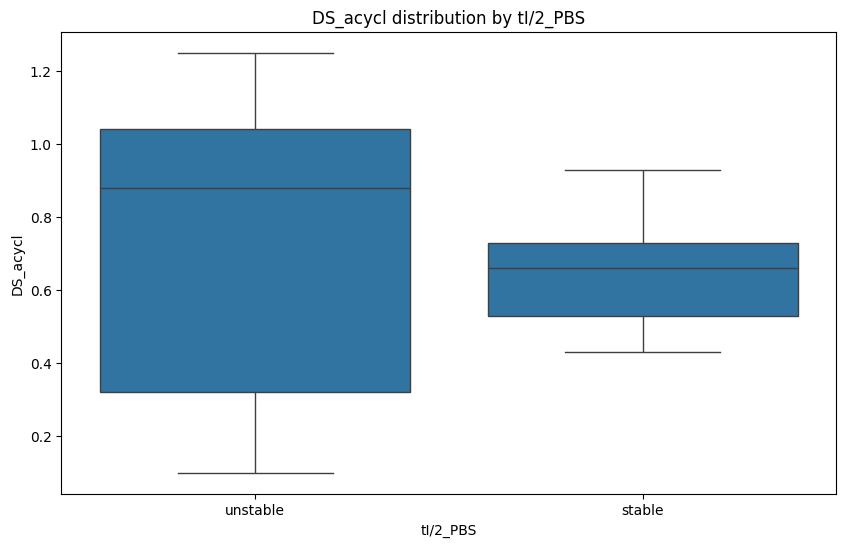

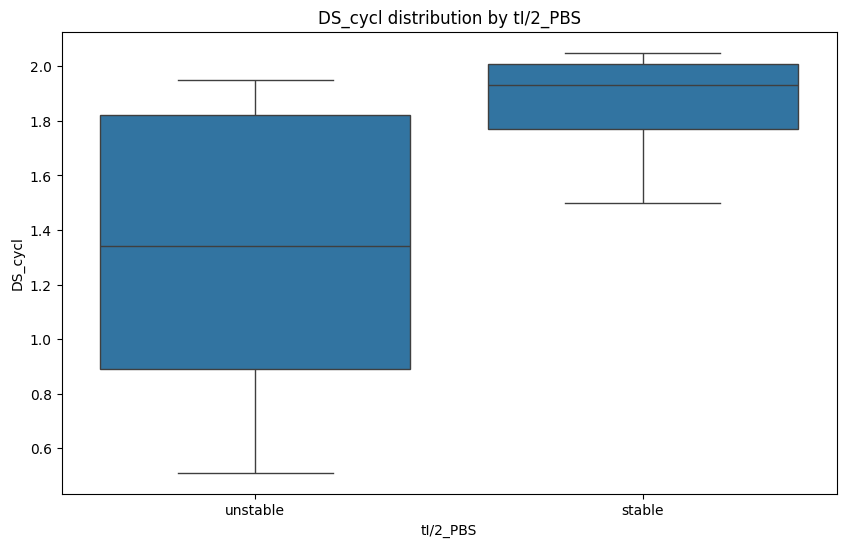


EDA completed. All plots have been displayed.


In [22]:
# Load the data
df = pd.read_csv('/home/ta45woj/PolySpeckML/data/Ac(e)DexStabilitydata_16_09_cleaned.csv')

# Drop Rows with Non-Numeric Values in 'tI/2_Acetate' Column
df['tI/2_Acetate'] = pd.to_numeric(df['tI/2_Acetate'], errors='coerce')
df = df.dropna(subset=['tI/2_Acetate'])

# Basic statistics
print("Basic Statistics:")
print(df[['DS_acycl', 'DS_cycl', 'tI/2_Acetate']].describe())

# Correlation matrix
corr_matrix = df[['DS_acycl', 'DS_cycl', 'tI/2_Acetate']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['DS_acycl'], df['tI/2_Acetate'])
plt.xlabel('DS_acycl')
plt.ylabel('tI/2_Acetate')
plt.title('DS_acycl vs tI/2_Acetate')

plt.subplot(1, 2, 2)
plt.scatter(df['DS_cycl'], df['tI/2_Acetate'])
plt.xlabel('DS_cycl')
plt.ylabel('tI/2_Acetate')
plt.title('DS_cycl vs tI/2_Acetate')
plt.tight_layout()
plt.show()

# Distribution plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['DS_acycl'], kde=True)
plt.title('Distribution of DS_acycl')

plt.subplot(1, 3, 2)
sns.histplot(df['DS_cycl'], kde=True)
plt.title('Distribution of DS_cycl')

plt.subplot(1, 3, 3)
sns.histplot(df['tI/2_Acetate'], kde=True)
plt.title('Distribution of tI/2_Acetate')
plt.tight_layout()
plt.show()

# Box plots for tI/2_PBS
plt.figure(figsize=(10, 6))
sns.boxplot(x='tI/2_PBS', y='DS_acycl', data=df)
plt.title('DS_acycl distribution by tI/2_PBS')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='tI/2_PBS', y='DS_cycl', data=df)
plt.title('DS_cycl distribution by tI/2_PBS')
plt.show()

# Statistical tests
stable_mask = df['tI/2_PBS'] == 'stable'
unstable_mask = df['tI/2_PBS'] == 'unstable'

t_test_acycl = stats.ttest_ind(df.loc[stable_mask, 'DS_acycl'], df.loc[unstable_mask, 'DS_acycl'])
t_test_cycl = stats.ttest_ind(df.loc[stable_mask, 'DS_cycl'], df.loc[unstable_mask, 'DS_cycl'])

print("\nEDA completed. All plots have been displayed.")